In [ ]:
!python -m pip install pyyaml==5.3.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


%pip install darwin-py

: 

In [2]:
# import torch, detectron2
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# print("detectron2:", detectron2.__version__)

/bin/bash: line 1: nvcc: command not found
torch:  1.12 ; cuda:  1.12.0


In [1]:
# %pip install darwin-py
!darwin authenticate
#61UjdbY.eUgwWuBx2tmOxOJRNdWM3phLYIECDiev
!darwin dataset pull pedro2team/oranges-apples-vases:oranges-apples-vases
!darwin dataset split pedro-team/oranges-apples-vases:oranges-apples-vases --val-percentage 10 --test-percentage 20
darwin dataset pull pedro2team/oranges-apples-vases:oranges-apples-vases1.0

/bin/bash: line 1: darwin: command not found
/bin/bash: line 1: darwin: command not found
/bin/bash: line 1: darwin: command not found


In [13]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
import detectron2
# import some common Detectron2 and Darwin utilities
from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, build_detection_test_loader, DatasetCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from darwin.torch.utils import detectron2_register_dataset


setup_logger()
# Register both training and validation sets
dataset_id = 'pedro2team/oranges-apples-vases:oranges-apples-vases1.0'
dataset_train = detectron2_register_dataset(dataset_id, partition='train', split_type='stratified')
dataset_val = detectron2_register_dataset(dataset_id, partition='val', split_type='stratified')

AssertionError: Dataset 'darwin_oranges-apples-vases_train' is already registered!

In [6]:
# Set up training configuration and train the model
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.DATASETS.TRAIN = (dataset_train,)
# cfg.DATASETS.TEST = (dataset_val,)
# cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# cfg.SOLVER.IMS_PER_BATCH = 8  # batch size
# cfg.SOLVER.BASE_LR = 0.005  # pick a good LR
# cfg.SOLVER.MAX_ITER = 5000  # and a good number of iterations
# cfg.SOLVER.STEPS = []  # milestones where the LR is reduced
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(MetadataCatalog.get(dataset_train).thing_classes) #numero de classes

# # Instantiate the trainer and train the model
# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=True)
# trainer.train()

In [4]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

ModuleNotFoundError: No module named 'tensorboard'

## AS DUAS CELULAS SEGUINTES SAO DO V7LABS, O RESTO E DO OUTRO GAJO

In [ ]:
# Evaluate the model #! VER
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
evaluator = COCOEvaluator(dataset_val, cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, dataset_val)
inference_on_dataset(trainer.model, val_loader, evaluator)

In [ ]:
import numpy as np
from PIL import Image
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer


cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)
im = np.array(Image.open('/home/jon/.darwin/datasets/v7-demo/bird-species/images/00004505.jpg'))
outputs = predictor(im[:, :, ::-1])

v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out_image = v.draw_instance_predictions(outputs["instances"].to("cpu"))

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:

In [7]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = (dataset_val, )
predictor = DefaultPredictor(cfg)

WARNING [02/27 23:13:38 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.anchor_deltas.bias in checkpoint is torch.Size([12]), while shape of proposal_generator.rpn_head.anchor_deltas.bias in model is torch.Size([60]).
WARNING [02/27 23:13:38 d2.checkpoint.c2_model_loading]: proposal_generator.rpn_head.anchor_deltas.bias will not be loaded. Please double check and see if this is desired.
WARNING [02/27 23:13:38 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.anchor_deltas.weight in checkpoint is torch.Size([12, 256, 1, 1]), while shape of proposal_generator.rpn_head.anchor_deltas.weight in model is torch.Size([60, 1024, 1, 1]).
WARNING [02/27 23:13:38 d2.checkpoint.c2_model_loading]: proposal_generator.rpn_head.anchor_deltas.weight will not be loaded. Please double check and see if this is desired.
WARNING [02/27 23:13:38 d2.checkpoint.c2_model_loading]: Shape of proposal_generator.rpn_head.conv.bias in checkpoint is torch.Size([256]), while s

Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible s

In [ ]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = get_balloon_dicts("balloon/val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=balloon_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(dataset_val, ("bbox",), False, output_dir="./output2/")
val_loader = build_detection_test_loader(cfg, "balloon_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

## Save config

In [ ]:
print(cfg.dump())

In [ ]:
f = open('config.yml', 'w')
f.write(cfg.dump())
f.close()

## Load trained model

In [10]:
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file("config.yml")

In [11]:
predictor = DefaultPredictor(cfg)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (4, 256, 1, 1) 

Found 0 invalid annotations
[02/28 00:17:27 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7fc2f94bad30> to CPU due to CUDA OOM


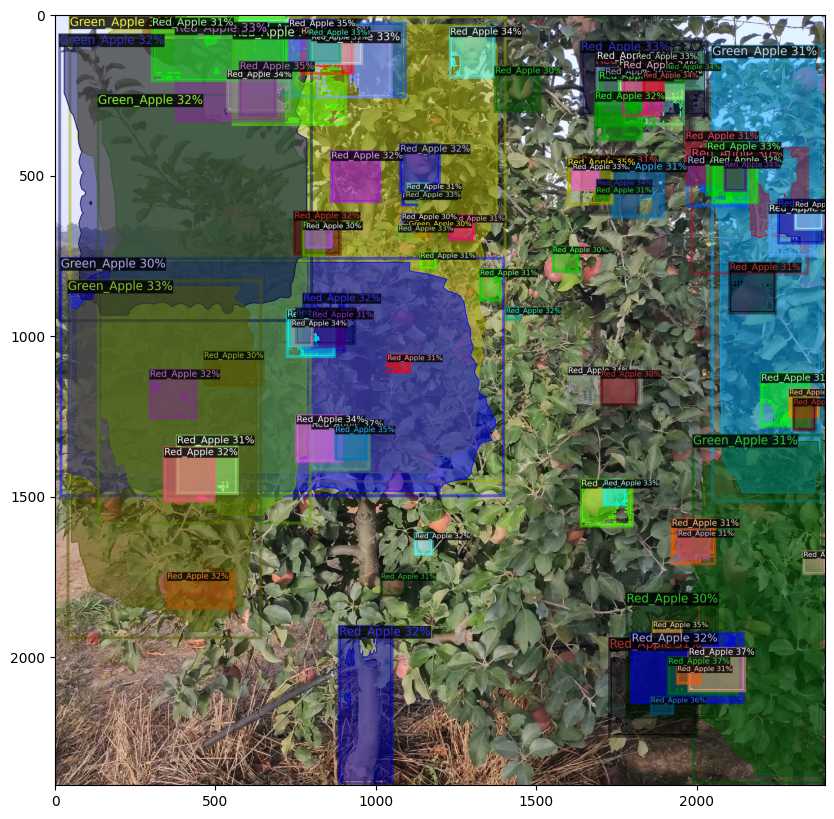

[02/28 00:17:36 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7fc2f94bad30> to CPU due to CUDA OOM


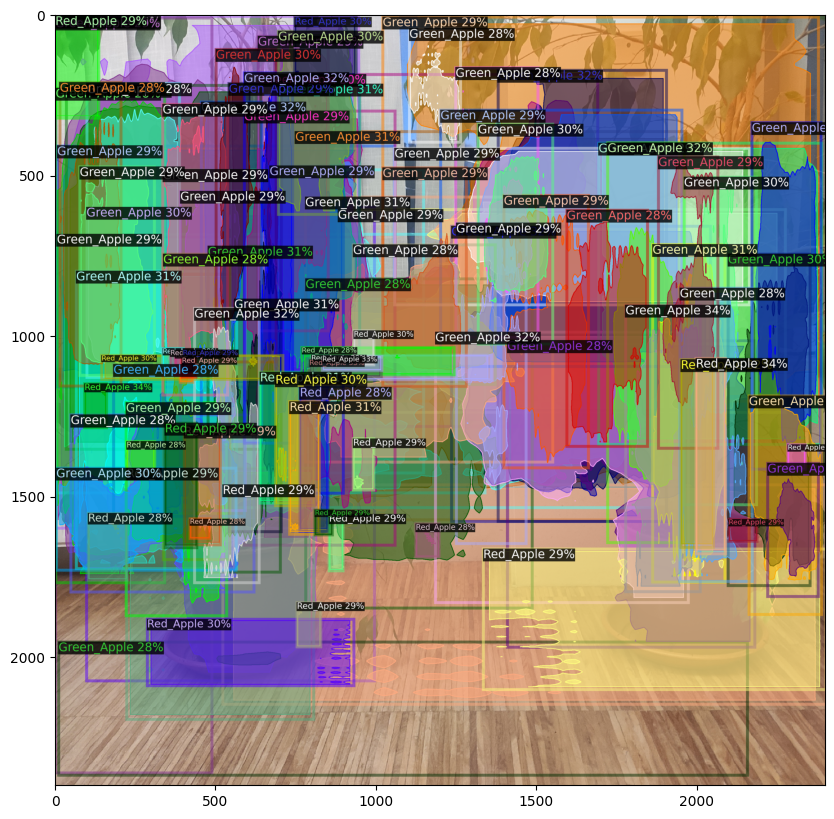

[02/28 00:17:49 d2.utils.memory]: Attempting to copy inputs of <function paste_masks_in_image at 0x7fc2f94bad30> to CPU due to CUDA OOM


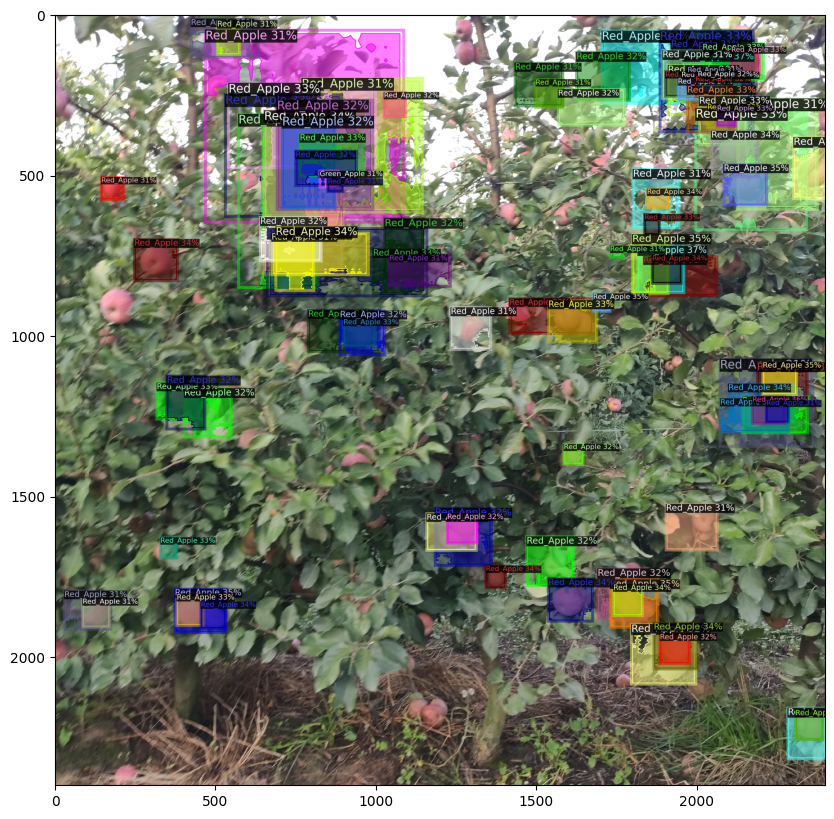

In [12]:
from detectron2.utils.visualizer import ColorMode
import random

dataset_dicts = DatasetCatalog.get(dataset_val)
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get(dataset_val), scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

## Continue training

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("config.yml")
cfg.SOLVER.MAX_ITER = 1000

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()